In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


BioPandas
Now computational biologists can analyse the PDB(Protein Data Bank) file format in python. Working with molecular structures of biological macromolecules (from PDB and MOL2 files) in pandas DataFrames is what BioPandas is all about!

In [3]:
%pip install biopandas

     |████████████████████████████████| 264 kB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from biopandas.pdb import PandasPdb

PDB file format

In the PDB data file format for macromolecular models, each atom is designated either ATOM or HETATM (which stands for hetero atom).

ATOM is reserved for atoms in standard residues of protein, DNA or RNA.

HETATM is applied to non-standard residues of protein, DNA or RNA, as well as atoms in other kinds of groups, such as carbohydrates, substrates, ligands, solvent, and metal ions.

In [6]:
ppdb_df =  PandasPdb().read_pdb('6lu7.pdb')

Analysis of COVID-19 virus

In [7]:
type(ppdb_df.df)

dict

In [8]:
ppdb_df.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [9]:
atom_df = ppdb_df.df['ATOM']
atom_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,1,,...,-32.073,9.085,33.695,1.0,38.90,,,N,NaN,424
1,ATOM,2,,CA,,SER,,A,1,,...,-32.156,8.073,34.741,1.0,37.44,,,C,NaN,425
2,ATOM,3,,C,,SER,,A,1,,...,-30.857,8.000,35.536,1.0,34.96,,,C,NaN,426
3,ATOM,4,,O,,SER,,A,1,,...,-30.047,8.926,35.507,1.0,33.29,,,O,NaN,427
4,ATOM,5,,CB,,SER,,A,1,,...,-32.483,6.704,34.140,1.0,44.07,,,C,NaN,428


In [13]:
het_df = ppdb_df.df['HETATM']
het_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,2369,,C4,,02J,,C,1,,...,-10.425,3.420,72.447,1.0,54.38,,,C,NaN,2792
1,HETATM,2370,,C5,,02J,,C,1,,...,-9.924,2.857,73.642,1.0,63.03,,,C,NaN,2793
2,HETATM,2371,,C6,,02J,,C,1,,...,-9.345,1.458,73.806,1.0,64.36,,,C,NaN,2794
3,HETATM,2372,,O1,,02J,,C,1,,...,-10.048,3.755,74.575,1.0,63.01,,,O,NaN,2795
4,HETATM,2373,,N2,,02J,,C,1,,...,-10.585,4.861,74.114,1.0,56.79,,,N,NaN,2796


In [11]:
ani_df = ppdb_df.df['ANISOU']
ani_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,"U(1,1)","U(2,2)","U(3,3)","U(1,2)","U(1,3)","U(2,3)",blank_4,element_symbol,charge,line_idx


In [14]:
ani_df = ppdb_df.df['OTHERS']
ani_df.head()

,record_name,entry,line_idx
0,HEADER,VIRAL PROTEIN 26...,0
1,TITLE,THE CRYSTAL STRUCTURE OF COVID-19 MAIN PRO...,1
2,TITLE,2 INHIBITOR N3,2
3,COMPND,MOL_ID: 1;,3
4,COMPND,2 MOLECULE: MAIN PROTEASE;,4


Visualize the b_factor
what is b_factor?

The B-factor describes the displacement of the atomic positions from an average (mean) value (mean-square displacement).

The core of the molecule usually has low B-factors, due to tight packing of the side chains (enzyme active sites are usually located there). The values of the B-factors are normally between 15 to 30 (sq. Angstroms), but often much higher than 30 for flexible regions.

Text(0.5, 0, 'B-Factor')

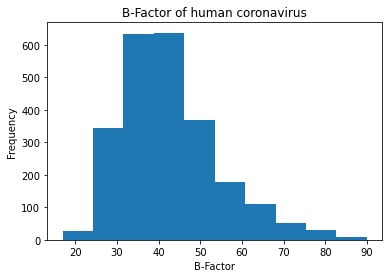

In [16]:
atom_df['b_factor'].plot(kind='hist')
plt.title('B-Factor of human coronavirus')
plt.xlabel('B-Factor')

It is observed that COVID-19 has high b_factor which means it is not tightly packed

In [17]:
atom_df.element_symbol.unique()

array(['N', 'C', 'O', 'S'], dtype=object)

Text(0.5, 0, 'Element symbol')

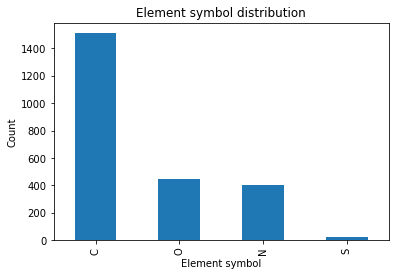

In [18]:
atom_df['element_symbol'].value_counts().plot(kind='bar')
plt.title('Element symbol distribution')
plt.ylabel('Count')
plt.xlabel('Element symbol')

Text(0.5, 0, 'atom_name symbol')

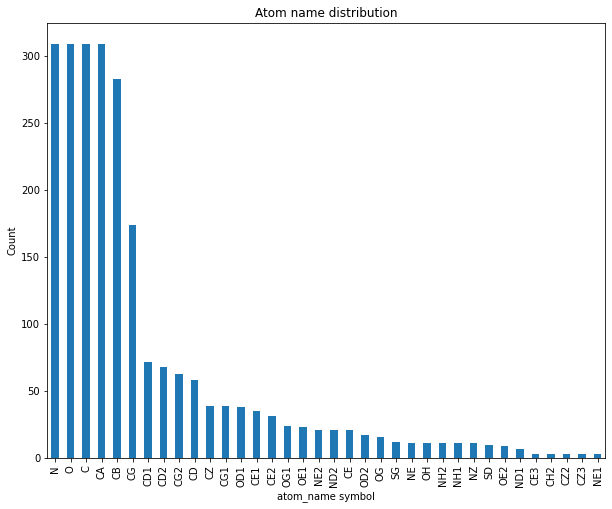

In [19]:
atom_df['atom_name'].value_counts().plot(kind='bar', figsize=(10,8))
plt.title('Atom name distribution')
plt.ylabel('Count')
plt.xlabel('atom_name symbol')

In [20]:
catom_df = ppdb_df.df['ATOM']
chtm_df = ppdb_df.df['HETATM']